### Importing Libraries 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
%matplotlib inline 

# Problem 1

### Problem 1 - Part 1

In [21]:
data = np.genfromtxt("data/curve80.txt", delimiter = None)
X = data[:, 0]         # Scalar feature value
X = np.atleast_2d(X).T # Converts the array into a transpose of the origina array 
Y = data[:, 1]         # target value y for each example
Xtr, Xte, Ytr, Yte = ml.splitData(X,Y, 0.75) # split data set 75/25

##### Printing the shapes of the objects

In [22]:
print("Shape of Training Data\n------------------------", "\nNumber of points: ", Xtr.shape[0], "\nNumber of features: ", Xtr.shape[1], "\n")
print("Shape of Test Data\n------------------------", "\nNumber of points: ", Xte.shape[0], "\nNumber of features: ", Xte.shape[1], "\n")
print("Shape of Training Target\n------------------------", "\nNumber of points: ", Ytr.shape[0], "\n")
print("Shape of Test Target\n------------------------", "\nNumber of points: ", Yte.shape[0])

Shape of Training Data
------------------------ 
Number of points:  60 
Number of features:  1 

Shape of Test Data
------------------------ 
Number of points:  20 
Number of features:  1 

Shape of Training Target
------------------------ 
Number of points:  60 

Shape of Test Target
------------------------ 
Number of points:  20


### Problem 1 - Part 2

In [23]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0, 10, 200) # densely sample possible x-values
xs = xs[:, np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict(xs) # make prediction at xs

##### Problem 1 - Part 2 - Part a

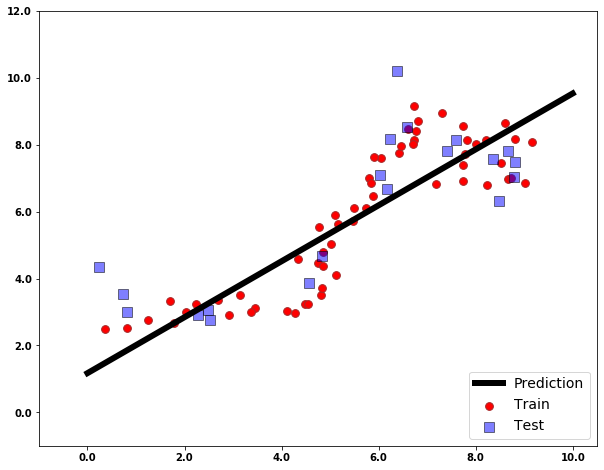

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(Xtr, Ytr, s = 60, color = "red", edgecolors = "brown", label = "Train")
ax.scatter(Xte, Yte, s = 90, color = "blue", edgecolors = "black", label = "Test", marker = "s", alpha = 0.5)
ax.plot(xs, ys, color = "black", lw = 6, label = "Prediction")
ax.set_xlim(-1.0, 10.5)  # Sets the limit for the X-axis
ax.set_ylim(-5.0, 8.0 )  # Sets the limit for the Y-axis
ax.set_xticklabels(ax.get_xticks(), fontdict = {"fontsize": 10, "fontweight": "bold"}) # Changes the styles of the X-axis numbers
ax.set_yticklabels(ax.get_xticks(), fontdict = {"fontsize": 10, "fontweight": "bold"}) # Changes the styles of the Y-axis numbers
plt.legend(fontsize = 14, loc = 4)
plt.show()

##### Problem 1 - Part 2 - Part b

In [25]:
theta = lr.theta.ravel()
print("Linear regression coefficients theta is: ", theta)
print("Theta 0: -2.82765049")
print("Theta 1: 0.83606916")

Linear regression coefficients theta is:  [-2.82765049  0.83606916]
Theta 0: -2.82765049
Theta 1: 0.83606916


##### Problem 1 - Part 2 - Part c

###### --> Theta 0 is the y-intercept and theta 1 is the slope if the line. Putting everything together we should have 
######     yHat(x) = theta 1 * X + theta 0

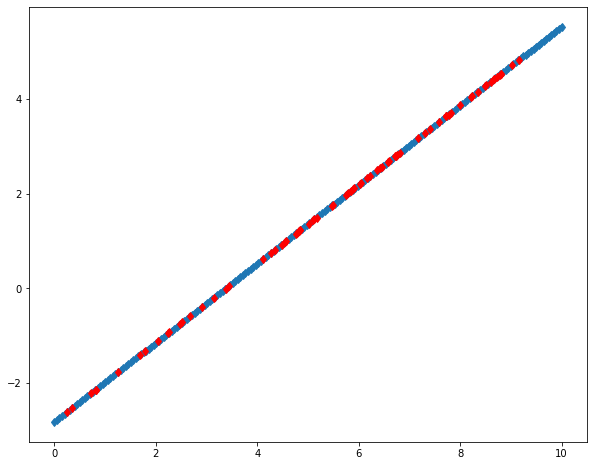

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.plot(xs, ys, X, theta[1] * X + theta[0], "r.", marker = "d", lw = 4, dash_joinstyle = "bevel", fillstyle = "full")
plt.show()

In [27]:
print("Mean squared error of training data is: " , lr.mse(Xtr,Ytr))
print("Mean squared error of testing data is: " , lr.mse(Xte,Yte))

Mean squared error of training data is:  1.127711955609391
Mean squared error of testing data is:  2.2423492030101246


### Problem 1 - Part 3

##### Problem 1 - Part 3 - Part a

Degree = 1


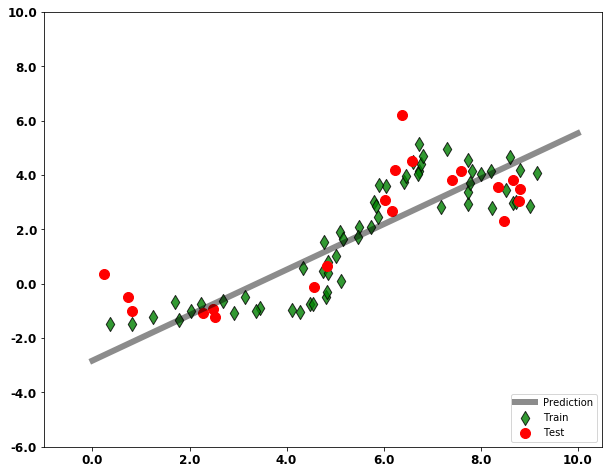

Degree = 3


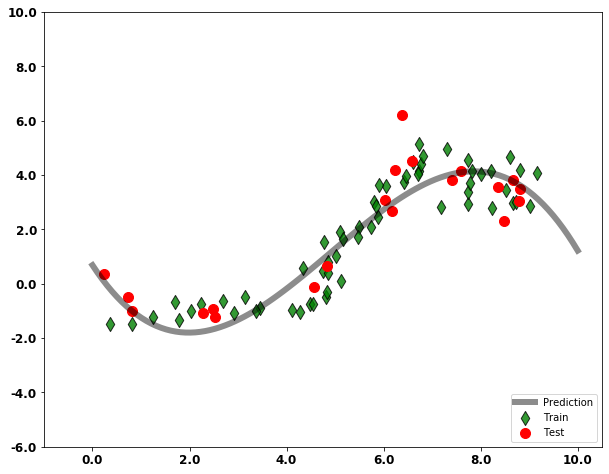

Degree = 5


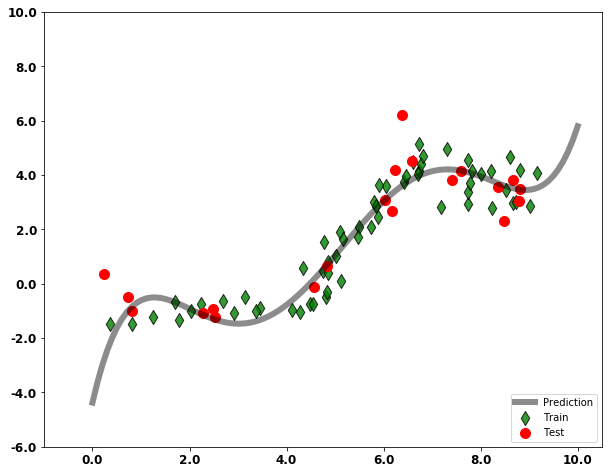

Degree = 7


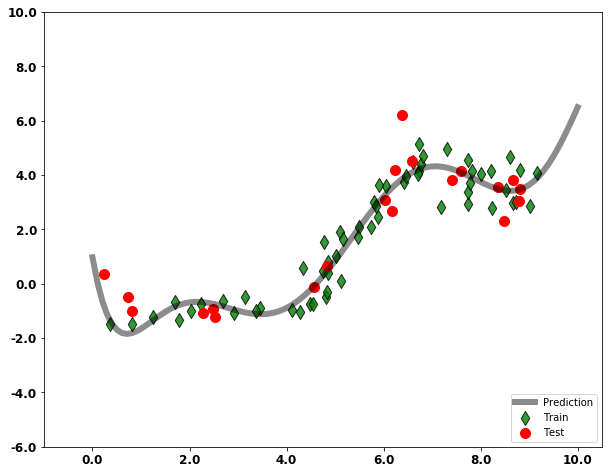

Degree = 10


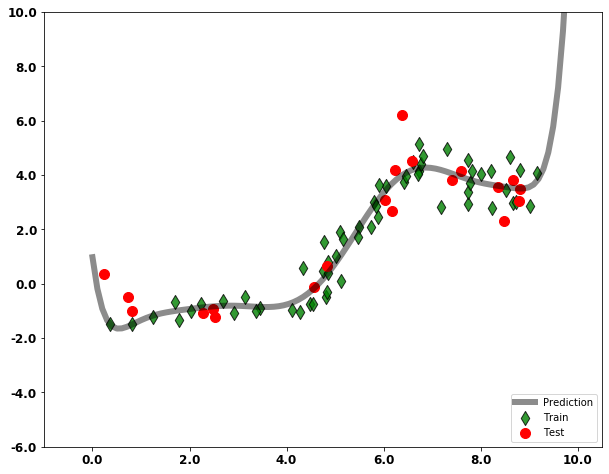

Degree = 15


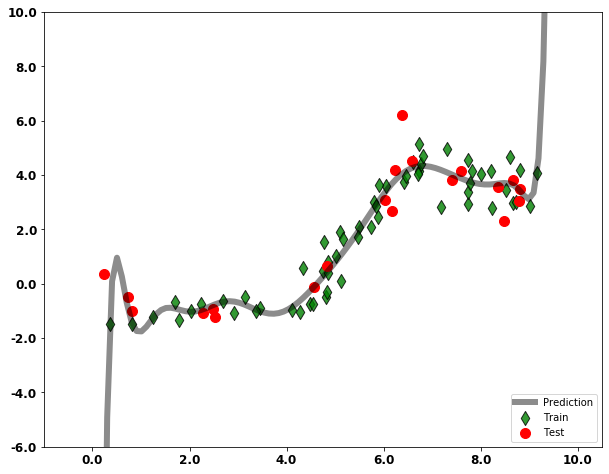

Degree = 18


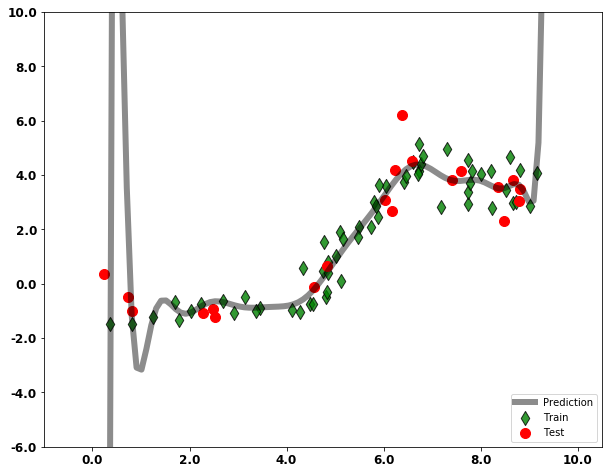

In [28]:
Xtr2 = np.zeros( (Xtr.shape[0], 2)) # Create Mx2 array to store features
Xtr2[:, 0] = Xtr[:, 0]        # place original "x" feature as X1
Xtr2[:, 1] = Xtr[:, 0] ** 2   # place "x^2" feature as X2
# Now Xtr2 has two features about each data point: "x" and "x^2"

d = [1, 3, 5, 7, 10, 15, 18]  # polynomial regression models of degrees
for i, degree in enumerate(d):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias = False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    # Create axes for single subplot
    fig, ax = plt.subplots(1, 1, figsize = (10, 8))
    xs = np.linspace(0, 10, 100)
    xs = xs[:, np.newaxis]
    xsP = ml.transforms.fpoly(xs, degree, False)
    xsP,_ = ml.transforms.rescale(xsP, params)
    ys = lr.predict(xsP)
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)

    ax.scatter(Xtr, Ytr, s = 100, color = "green", edgecolors = "black", marker = "d", alpha = 0.8, label = "Train")
    ax.scatter(Xte, Yte, s = 400, marker = ".", color = "red", label = "Test")
    #Also plotting the regression line
    # Plot polynomial regression of desired degree
    ax.plot(xs, ys, lw = 6, color = "black", alpha = 0.45, label = "Prediction")
     # Set the minimum and maximum limits
    ax.set_xlim(-1.0, 10.5)
    ax.set_ylim(-6.0, 10.0)
    # Changes the styles of the X-axis numbers
    ax.set_xticklabels(ax.get_xticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
    # Changes the styles of the Y-axis numbers
    ax.set_yticklabels(ax.get_yticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
    ax.legend(fontsize = 10, loc = 4)
    print("Degree = " + str(degree))
    plt.show()

##### Problem 1 - Part 3 - Part b

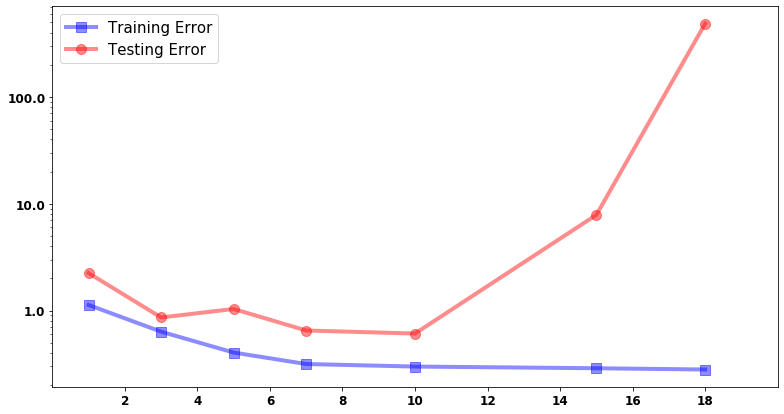

In [29]:
train_error = [0] * 7
test_error  = [0] * 7
for i, degree in enumerate(d):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias = False)
    XtrP, params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte, degree, False), params)
    train_error[i] = lr.mse(XtrP, Ytr)
    test_error[i] = lr.mse(XteP, Yte)

fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.semilogy(d, train_error, lw = 4, marker = "s", color = "blue", markersize = 10, alpha = 0.45, label = "Training Error")
ax.semilogy(d, test_error, lw = 4, marker = "o", color = "red", markersize = 10, alpha = 0.45, label = "Testing Error")
ax.set_xlim(0.0, 20)
ax.set_xticks(np.arange(2, 20, 2))
ax.set_xticklabels(ax.get_xticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
ax.set_yticklabels(ax.get_yticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
ax.legend(fontsize = 15, loc = 0)
plt.show()

##### Problem 1 - Part 3 - Part b

###### As shown in the figure above, error improves in some areas and breaks sharply at some other points. as degree increases the error increases. therefore degree 10 works the best due to sharp breaks at some points and improvements at some points

# Problem 2

### Problem 2 - Part 1

Mean:  35524.38656208917


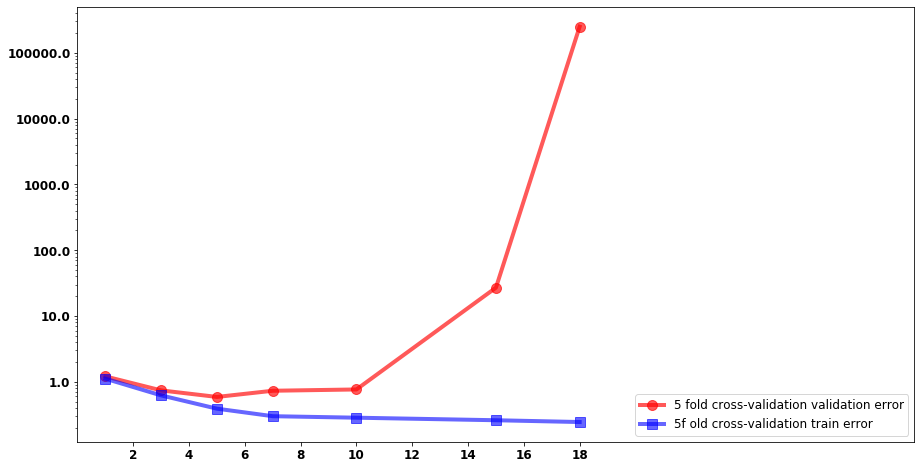

In [30]:
nFolds = 5;
d = [1, 3, 5, 7, 10, 15, 18]
J = np.zeros((len(d), nFolds))
training_J = np.zeros((len(d), nFolds))
for t, degree in enumerate(d):
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold) # use ith block as validation
        XtiP = ml.transforms.fpoly(Xti, degree, bias = False)
        XtiP, params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti) # TODO: train on Xti, Yti, the data for this fold
        XviP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xvi, degree, False), params)
        J[t,iFold] = lr.mse(XviP, Yvi)
        training_J[t,iFold] = lr.mse(XtiP, Yti)

mean_validation = [0]*7
mean_training = [0]*7
for k in range(7):
    mean_validation[k] = np.mean(J[k])
    mean_training[k] = np.mean(training_J[k])

fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.semilogy(d, mean_validation, lw = 4, marker = "o", color = "red", markersize = 10, alpha = 0.65, label = "5 fold cross-validation validation error")
ax.semilogy(d, mean_training, lw = 4, marker = "s", color = "blue", markersize = 10, alpha = 0.60, label = "5f old cross-validation train error")
ax.set_xlim(0.0, 30)
ax.set_xticks(np.arange(2, 20, 2))
ax.set_xticklabels(ax.get_xticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
ax.set_yticklabels(ax.get_yticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
# Controlling the size of the legend and the location.
ax.legend(fontsize = 12, loc = 4)
print("Mean: ", np.mean(J))


### Problem 2 - Part 2

###### The same error happend in the figure as the one in problem 1 bur when MSE was used the error increased by higher difference compared to when cross validation was used and in that regards the error increases as the degree increases

### Problem 2 - Part 3

In [31]:
print("Polynomial degree of: ", d[np.argmin(mean_validation)])

Polynomial degree of:  5


### Problem 2 - Part 4

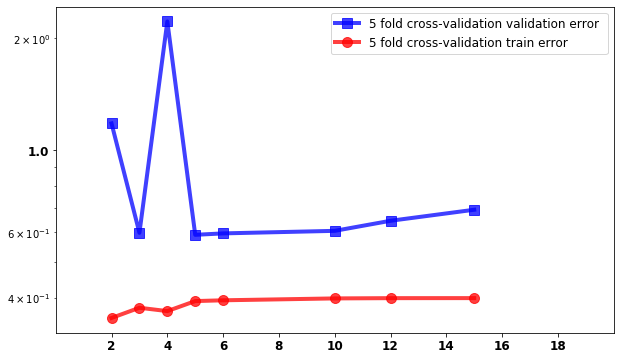

In [32]:
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
degree = 5

J = np.zeros(len(nFolds))
training_J = np.zeros(len(nFolds))
for j, nFold in enumerate(nFolds):
    for iFold in range(nFold):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr,Ytr,nFold,iFold) # use ith block as validation
        XtiP = ml.transforms.fpoly(Xti, degree, bias = False)
        XtiP, params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti) # TODO: train on Xti, Yti, the data for this fold
        XviP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xvi, degree, False), params)
        J[j] += lr.mse(XviP, Yvi)
        training_J[j] += lr.mse(XtiP, Yti)
    J[j] = J[j] / nFold
    training_J[j] = training_J[j] / nFold

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.semilogy(nFolds, J, lw = 4, marker = "s", color = "blue", markersize = 10, alpha = 0.75, label =
"5 fold cross-validation validation error ")
ax.semilogy(nFolds, training_J, lw = 4, marker = "o", color = "red", markersize = 10, alpha = 0.75, label =
"5 fold cross-validation train error")
ax.set_xlim(0.0, 20)
ax.set_xticks(np.arange(2, 20, 2))
ax.set_xticklabels(ax.get_xticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
ax.set_yticklabels(ax.get_yticks(), fontdict = {"fontsize": 12, "fontweight": "bold"})
# Controlling the size of the legend and the location.
ax.legend(fontsize = 12, loc = 0)
plt.show()

# Problem 3

######  Reading the lecture notes and getting help from discussion section and piazza  were very helpful.
###### It helped me to complete this homework.